In [ ]:
#pip install tensorflow-gpu
!pip install timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 10.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylin

In [ ]:
# Load the ViT models
import timm
import torch
vit_base_model = timm.create_model('vit_base_patch16_224', pretrained=True)
vit_small_model = timm.create_model('vit_small_patch16_224', pretrained=True)
vit_tiny_model = timm.create_model('vit_tiny_patch16_224', pretrained=True)

# Count the number of trainable parameters for each model
num_params_base = sum(p.numel() for p in vit_base_model.parameters() if p.requires_grad)
num_params_small = sum(p.numel() for p in vit_small_model.parameters() if p.requires_grad)
num_params_tiny = sum(p.numel() for p in vit_tiny_model.parameters() if p.requires_grad)

# Print the number of parameters for each model
print(f"Number of trainable parameters in ViT base model: {num_params_base}")
print(f"Number of trainable parameters in ViT small model: {num_params_small}")
print(f"Number of trainable parameters in ViT tiny model: {num_params_tiny}")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/88.2M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/22.9M [00:00<?, ?B/s]

Number of trainable parameters in ViT base model: 86567656
Number of trainable parameters in ViT small model: 22050664
Number of trainable parameters in ViT tiny model: 5717416


In [ ]:
vit_tiny_model = timm.create_model('vit_tiny_patch16_224', pretrained=True)
num_params_tiny = sum(p.numel() for p in vit_tiny_model.parameters() if p.requires_grad)
print(f"Number of trainable parameters in ViT tiny model: {num_params_tiny}")

Number of trainable parameters in ViT tiny model: 5717416


In [ ]:
# Import necessary packages.
import numpy as np
from PIL import Image

import torch
import torch.nn as nn

from torch.utils.data import random_split
from torch.utils.data import DataLoader, Subset

import torchvision
from torchvision import datasets
from torchvision.datasets import DatasetFolder
import torchvision.transforms as transforms
import torchvision.models as models

# This is for the progress bar
from tqdm.auto import tqdm
#pip install keras tensorflow
# This is for ploting
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.resnet50 import preprocess_input
import torch.optim as optim
import timm
from torchvision.models import resnet50

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Thu May  2 12:27:30 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 13.6 gigabytes of available RAM

Not using a high-RAM runtime


In [ ]:
import torch

if torch.cuda.is_available():
    print("CUDA is available and enabled.")
else:
    print("CUDA is not available or not properly configured.")

CUDA is available and enabled.


In [ ]:
# Install a package to download data from Kaggle
!pip install -q opendatasets

In [ ]:
import opendatasets as od
import pandas as pd

od.download('https://www.kaggle.com/datasets/shuvoalok/raf-db-dataset/') # insert ypu kaggle username and key

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: omari11234
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/shuvoalok/raf-db-dataset


100%|██████████| 37.7M/37.7M [00:00<00:00, 92.7MB/s]


In [ ]:
height, width = 224, 224

In [ ]:
data_transform = transforms.Compose([
    transforms.RandomRotation(20),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomResizedCrop(size=(height, width), scale=(0.8, 1.2)),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
    transforms.ToTensor(),
])

In [ ]:
test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

In [ ]:
batch_size=32

In [ ]:
train_path = "raf-db-dataset/DATASET/train"

In [ ]:
test_path = "raf-db-dataset/DATASET/test"

In [ ]:
#train_path = "raf-db-dataset/DATASET/train", transform=data_transform

In [ ]:
#train_generator = datagen.flow_from_directory(
    #train_path,
   # target_size=(224, 224),  # Adjust based on the input size expected by your model
   # batch_size=batch_size,
  #  class_mode='categorical')

In [ ]:
# Construct datasets.
train_dataset = datasets.ImageFolder(train_path, transform=data_transform )#transform=None as we are doing the augmentations ourselve transform=train_transfor
test_dataset = datasets.ImageFolder(test_path, transform=test_transform)  #transform=None transform=test_transform


# Define the desired ratio for train and evaluation data (e.g., 90% train, 10% evaluation)
train_ratio = 0.9
val_ratio = 1 - train_ratio

# Calculate the sizes of train and evaluation datasets based on the ratios
train_size = int(train_ratio * len(train_dataset))
val_size = len(train_dataset) - train_size

# Split the train dataset into train and evaluation subsets
train_subset, val_subset = random_split(train_dataset, [train_size, val_size])

print(f'Original train set has {len(train_dataset)} samples')
print(f'Train set has {len(train_subset)} samples')
print(f'Validation set has {len(val_subset)} samples')
print(f'Test set has {len(test_dataset)} samples')

Original train set has 12271 samples
Train set has 11043 samples
Validation set has 1228 samples
Test set has 3068 samples


In [ ]:
# Batch size for training, validation, and testing.
# A greater batch size usually gives a more stable gradient.
# But the GPU memory is limited, so please adjust it carefully.
#need to adjust batch size
#batch_size = 32

# Construct data loaders
train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True, num_workers=0, pin_memory=True)
valid_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=True, num_workers=0, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

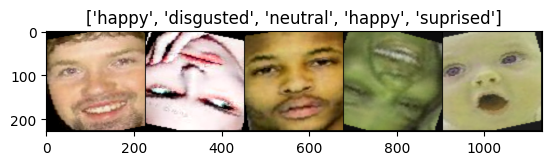

In [ ]:
# show some samples
def imshow(inp, title=None):
    """Display image for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

# Get a batch of training data
train_loader_for_vis = DataLoader(train_subset, batch_size=5, shuffle=True, num_workers=0)
inputs, classes = next(iter(train_loader_for_vis))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

class_names = ['suprised', 'fearful', 'disgusted', 'happy', 'sad', 'angry', 'neutral']

imshow(out, title=[class_names[x] for x in classes])

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
import torch

if torch.cuda.is_available():
    print("CUDA is available and enabled.")
else:
    print("CUDA is not available or not properly configured.")

CUDA is available and enabled.


In [ ]:
num_classes = 7  # Replace with the desired number of classes

In [ ]:
criterion = nn.CrossEntropyLoss()

In [ ]:
vit_model = timm.create_model('vit_tiny_patch16_224', pretrained=True)
vit_model.head = nn.Linear(vit_model.head.in_features, num_classes)

In [ ]:

vit_optimizer = torch.optim.Adam(vit_model.parameters(), lr=0.0003)


In [ ]:
num_classes = 7

In [ ]:
resnext_model = resnext_50_32x4d = models.resnext50_32x4d(pretrained=True)
resnext_model.fc = nn.Linear(resnext_model.fc.in_features, num_classes)
resnext_model.fc = resnext_model.fc.to(device)
resnextaoptimizer = torch.optim.Adam(resnext_model.parameters(), lr=0.0003)
resnextsgd_optimizer = torch.optim.SGD(resnext_model.parameters(), lr=0.01, momentum=0.9, weight_decay=1e-4)
# Set the model to evaluation mode
#resnext_model.eval()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNeXt50_32X4D_Weights.IMAGENET1K_V1`. You can also use `weights=ResNeXt50_32X4D_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnext50_32x4d-7cdf4587.pth" to /root/.cache/torch/hub/checkpoints/resnext50_32x4d-7cdf4587.pth
100%|██████████| 95.8M/95.8M [00:00<00:00, 137MB/s]


In [ ]:
hybrid_optimizer = optim.Adam(
    [
        {"params": resnext_model.parameters(), "lr": 0.0003},
        {"params": vit_model.parameters(), "lr": 0.0003},
    ]
)

In [ ]:
# Integration point: Combine ResNeXt and ViT features
class HybridModel(nn.Module):
    def __init__(self, resnext_model, vit_model):
        super(HybridModel, self).__init__()
        # Feature extractor (ResNeXt)
        self.resnext_features = nn.Sequential(*list(resnext_model.children())[:-2])

        # Vision Transformer (ViT)
        self.vit_features = vit_model

        # Final classification head
        self.fc = nn.Linear(resnext_model.fc.in_features + vit_model.head.in_features, num_classes)

    def forward(self, x):
        # Extract features from ResNeXt
        resnext_features = self.resnext_features(x)

        # Forward ViT features
        vit_features = self.vit_features(x)

        # Global average pooling for ResNeXt features
        resnext_features = resnext_features.mean([2, 3])

        # Concatenate ResNeXt and ViT features
        combined_features = torch.cat([resnext_features, vit_features], dim=1)

        # Final classification
        output = self.fc(combined_features)

        return output

# Instantiate the hybrid model
hybrid_model = HybridModel(resnext_model, vit_model)
hybrid_model.to(device)

HybridModel(
  (resnext_features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
        (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(128, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequenti

In [ ]:
# Instantiate the hybrid model
hybrid_model = HybridModel(resnext_model, vit_model)
hybrid_model.to(device)
n_epochs = 30# Initialize variables to keep track of the best validation accuracy and its corresponding epoch number
best_valid_acc = 0
best_epoch = 0
best_valid_loss = float('inf')
best_train_acc = 0
best_train_loss = float('inf')

for epoch in range(n_epochs):
    # Training loop
    hybrid_model.train()

    train_loss = []
    train_accs = []

    for batch in tqdm(train_loader):
        hybrid_optimizer.zero_grad()

        imgs, labels = batch
        imgs = imgs.to(device)
        labels = labels.to(device)

        resnext_logits = resnext_model(imgs)
        vit_logits = vit_model(imgs)
        loss = criterion(resnext_logits, labels) + criterion(vit_logits, labels)
        loss.backward()
        hybrid_optimizer.step()
        acc = ((resnext_logits.argmax(dim=-1) == labels) & (vit_logits.argmax(dim=-1) == labels)).float().mean()
        train_loss.append(loss.item())
        train_accs.append(acc.item())
    train_loss = sum(train_loss) / len(train_loss)
    train_acc = sum(train_accs) / len(train_accs)
    train_loss_epochs.append(train_loss)
    train_acc_epochs.append(train_acc)

    # Validation loop
    hybrid_model.eval()
    valid_loss = []
    valid_accs = []
    for batch in tqdm(valid_loader):
        imgs, labels = batch
        imgs = imgs.to(device)
        labels = labels.to(device)
        with torch.no_grad():
            resnext_logits = resnext_model(imgs)
            vit_logits = vit_model(imgs)
        loss = criterion(resnext_logits, labels) + criterion(vit_logits, labels)
        acc = ((resnext_logits.argmax(dim=-1) == labels) & (vit_logits.argmax(dim=-1) == labels)).float().mean()
        valid_loss.append(loss.item())
        valid_accs.append(acc.item())
    valid_loss = sum(valid_loss) / len(valid_loss)
    valid_acc = sum(valid_accs) / len(valid_accs)
    valid_loss_epochs.append(valid_loss)
    valid_acc_epochs.append(valid_acc)

    # Save the best model based on validation accuracy
    if valid_acc > best_valid_acc:
        best_valid_acc = valid_acc
        best_epoch = epoch + 1  # Add 1 because epochs start from 0
        best_valid_loss = valid_loss
        best_train_acc = train_acc
        best_train_loss = train_loss
        torch.save(hybrid_model.state_dict(), 'best_model.pth')

    # Print the information.
    print(f"[Epoch: {epoch + 1:03d}/{n_epochs:03d}] Train: loss={train_loss:.5f}, acc={train_acc:.5f} | Valid: loss={valid_loss:.5f}, acc={valid_acc:.5f}")

# Return the results for the epoch with the best validation accuracy
print(f"Best Epoch: {best_epoch}, Train Loss: {best_train_loss}, Train Acc: {best_train_acc}, Valid Loss: {best_valid_loss}, Valid Acc: {best_valid_acc}")

  0%|          | 0/346 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
pip install tensorflow-addons

In [ ]:
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.keras import layers, Model

# Build DenseNet model
def build_densenet(input_shape, num_blocks=4, growth_rate=32, num_classes=7):
    # Function for building the dense block
    def dense_block(x, blocks):
        for _ in range(blocks):
            x = conv_block(x, growth_rate)
        return x

    # Function for building the convolutional block within a dense block
    def conv_block(x, growth_rate):
        x1 = layers.BatchNormalization()(x)
        x1 = layers.Activation('relu')(x1)
        x1 = layers.Conv2D(4 * growth_rate, 1, padding='same', kernel_initializer='he_normal')(x1)
        x1 = layers.BatchNormalization()(x1)
        x1 = layers.Activation('relu')(x1)
        x1 = layers.Conv2D(growth_rate, 3, padding='same', kernel_initializer='he_normal')(x1)
        x = layers.Concatenate()([x, x1])
        return x

    # Initial convolutional layer
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(64, 7, strides=2, padding='same', kernel_initializer='he_normal')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D(3, strides=2, padding='same')(x)

    # Dense blocks
    for i in range(num_blocks):
        x = dense_block(x, 4)
        if i != num_blocks - 1:
            x = layers.BatchNormalization()(x)
            x = layers.Activation('relu')(x)
            x = layers.Conv2D(growth_rate * 2, 1, padding='same', kernel_initializer='he_normal')(x)
            x = layers.AveragePooling2D(2, strides=2)(x)

    # Final layers
    x = layers.GlobalAveragePooling2D()(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    # Create model
    model = Model(inputs, outputs)
    return model

# Build Vision Transformer (ViT) model
def build_vit(input_shape, num_classes):
    model = tf.keras.Sequential([
        layers.Input(shape=input_shape),
        layers.Reshape((-1, input_shape[0] * input_shape[1])),
        layers.Permute((2, 1)),
        tfa.layers.MultiHeadAttention(num_heads=8, key_dim=256, dropout=0.1),
        layers.GlobalAveragePooling1D(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

# Combine DenseNet and ViT
def combine_densenet_vit(input_shape, num_classes):
    densenet_model = build_densenet(input_shape, num_classes=num_classes)
    vit_model = build_vit((input_shape[0] // 4, input_shape[1] // 4, 64), num_classes)

    input_img = layers.Input(shape=input_shape)
    densenet_output = densenet_model(input_img)
    vit_output = vit_model(input_img)

    # Concatenate outputs
    combined_output = layers.Concatenate()([densenet_output, vit_output])

    # Create combined model
    combined_model = Model(inputs=input_img, outputs=combined_output)
    return combined_model

# Example usage:
#input_shape = (224, 224, 3)
#num_classes = 10

#combined_model = combine_densenet_vit(input_shape, num_classes)
#combined_model.summary()


In [ ]:
import tensorflow as tf
from tqdm import tqdm

# Initialize variables to keep track of the best validation accuracy and its corresponding epoch number
best_valid_acc = 0
best_epoch = 0
best_valid_loss = float('inf')
best_train_acc = 0
best_train_loss = float('inf')

n_epochs = 30  # Define the number of epochs

# Assume train_loader and valid_loader are TensorFlow Dataset objects
train_loader = ...  # Your training data loader
valid_loader = ...  # Your validation data loader

# Define optimizer and loss function
optimizer = tf.keras.optimizers.Adam()
loss_function = tf.keras.losses.SparseCategoricalCrossentropy()

for epoch in range(n_epochs):
    # Training loop
    train_loss = []
    train_accs = []

    for batch in tqdm(train_loader):
        imgs, labels = batch
        with tf.GradientTape() as tape:
            combined_output = combined_model(imgs, training=True)
            loss = loss_function(labels, combined_output)
        gradients = tape.gradient(loss, combined_model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, combined_model.trainable_variables))

        # Compute training accuracy
        predictions = tf.argmax(combined_output, axis=1)
        acc = tf.reduce_mean(tf.cast(tf.equal(predictions, labels), dtype=tf.float32))
        train_loss.append(loss.numpy())
        train_accs.append(acc.numpy())

    train_loss = sum(train_loss) / len(train_loss)
    train_acc = sum(train_accs) / len(train_accs)

    # Validation loop
    valid_loss = []
    valid_accs = []
    for batch in tqdm(valid_loader):
        imgs, labels = batch
        combined_output = combined_model(imgs, training=False)
        loss = loss_function(labels, combined_output)

        # Compute validation accuracy
        predictions = tf.argmax(combined_output, axis=1)
        acc = tf.reduce_mean(tf.cast(tf.equal(predictions, labels), dtype=tf.float32))
        valid_loss.append(loss.numpy())
        valid_accs.append(acc.numpy())

    valid_loss = sum(valid_loss) / len(valid_loss)
    valid_acc = sum(valid_accs) / len(valid_accs)

    # Save the best model based on validation accuracy
    if valid_acc > best_valid_acc:
        best_valid_acc = valid_acc
        best_epoch = epoch + 1  # Add 1 because epochs start from 0
        best_valid_loss = valid_loss
        best_train_acc = train_acc
        best_train_loss = train_loss
        combined_model.save_weights('best_model.h5')

    # Print the information.
    print(f"[Epoch: {epoch + 1:03d}/{n_epochs:03d}] Train: loss={train_loss:.5f}, acc={train_acc:.5f} | Valid: loss={valid_loss:.5f}, acc={valid_acc:.5f}")

# Return the results for the epoch with the best validation accuracy
print(f"Best Epoch: {best_epoch}, Train Loss: {best_train_loss}, Train Acc: {best_train_acc}, Valid Loss: {best_valid_loss}, Valid Acc: {best_valid_acc}")


In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Construct datasets.
train_dataset = tf.data.Dataset.from_tensor_slices((train_dataset, train_labels))
test_dataset = tf.data.Dataset.from_tensor_slices((test_dataset, test_labels))

# Define the desired ratio for train and evaluation data (e.g., 90% train, 10% evaluation)
train_ratio = 0.9
val_ratio = 1 - train_ratio

# Split the train dataset into train and evaluation subsets
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size=val_ratio, random_state=42)

# Shuffle and batch the datasets
train_dataset = train_dataset.shuffle(buffer_size).batch(batch_size)
val_dataset = tf.data.Dataset.from_tensor_slices((val_data, val_labels)).batch(batch_size)

print(f'Original train set has {len(train_data)} samples')
print(f'Train set has {len(train_dataset)} samples')
print(f'Validation set has {len(val_dataset)} samples')
print(f'Test set has {len(test_dataset)} samples')


In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models
import timm

class HybridModel(nn.Module):
    def __init__(self, resnext_model, vit_model, num_classes):
        super(HybridModel, self).__init__()
        # Feature extractor (ResNeXt)
        self.resnext_features = nn.Sequential(*list(resnext_model.children())[:-2])

        # Vision Transformer (ViT)
        self.vit_features = vit_model

        # Calculate the size of ResNeXt features
        resnext_output_size = resnext_model.fc.in_features

        # Final classification head
        self.fc = nn.Linear(resnext_output_size + vit_model.head.in_features, num_classes)

    def forward(self, x):
        # Extract features from ResNeXt
        resnext_features = self.resnext_features(x)

        # Forward ViT features
        vit_features = self.vit_features(x)

        # Flatten ResNeXt features
        resnext_features = resnext_features.flatten(start_dim=1)

        # Concatenate ResNeXt and ViT features
        combined_features = torch.cat([resnext_features, vit_features], dim=1)

        # Final classification
        output = self.fc(combined_features)

        return output

# Example usage:
# Replace these with your actual models and number of classes
resnext_model = models.resnext50_32x4d(pretrained=True)
vit_model = timm.create_model('vit_base_patch16_224', pretrained=True)
num_classes = 10  # Example number of classes

# Create the hybrid model
hybrid_model = HybridModel(resnext_model, vit_model, num_classes)

# Forward pass example
# Assuming `x` is your input tensor
x = torch.randn(1, 3, 224, 224)  # Example input tensor
output = hybrid_model(x)
print(output.shape)  # Example output shape


In [ ]:
from torch.utils.data import Dataset
from PIL import Image

class CustomImageDataset(Dataset):
    def __init__(self, dataset):
        self.dataset = dataset

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        image_path = self.dataset[idx][0]  # Assuming the image path is the first element in each sample tuple
        label = self.dataset[idx][1]  # Assuming the label is the second element in each sample tuple
        image = Image.open(image_path).convert('RGB')  # Load the image using PIL
        return image, label


In [ ]:
from torch.utils.data import DataLoader

# Create custom datasets
train_custom_dataset = CustomImageDataset(train_subset)
valid_custom_dataset = CustomImageDataset(val_subset)
test_custom_dataset = CustomImageDataset(test_dataset)

# Create DataLoader instances
train_loader = DataLoader(train_custom_dataset, batch_size=batch_size, shuffle=True, num_workers=0, pin_memory=True)
valid_loader = DataLoader(valid_custom_dataset, batch_size=batch_size, shuffle=True, num_workers=0, pin_memory=True)
test_loader = DataLoader(test_custom_dataset, batch_size=batch_size, shuffle=False)


In [ ]:
class HybridModel(nn.Module):
    def __init__(self, resnext_model, vit_model, num_classes):
        super(HybridModel, self).__init__()
        # Feature extractor (ResNeXt)
        self.resnext_features = nn.Sequential(*list(resnext_model.children())[:-2])

        # Vision Transformer (ViT)
        self.vit_features = vit_model

        # Final classification head
        self.fc = nn.Linear(resnext_model.fc.in_features + vit_model.head.in_features, num_classes)

    def forward(self, x):
        # Extract features from ResNeXt
        resnext_features = self.resnext_features(x)

        # Flatten ResNeXt features
        resnext_features = resnext_features.reshape(resnext_features.shape[0], -1)

        # Forward ViT features
        vit_features = self.vit_features(x)

        # Concatenate ResNeXt and ViT features
        combined_features = torch.cat([resnext_features, vit_features], dim=1)

        # Final classification
        output = self.fc(combined_features)

        return output


In [ ]:
class HybridModel(nn.Module):
    def __init__(self, resnext_model, vit_model, num_classes):
        super(HybridModel, self).__init__()
        # Feature extractor (ResNeXt)
        self.resnext_features = nn.Sequential(*list(resnext_model.children())[:-2])

        # Flatten layer for ResNeXt features
        self.resnext_flatten = nn.Flatten()

        # Vision Transformer (ViT)
        self.vit_features = vit_model

        # Final classification head
        self.fc = nn.Linear(vit_model.head.in_features, num_classes)

    def forward(self, x):
        # Extract features from ResNeXt
        resnext_features = self.resnext_features(x)

        # Flatten ResNeXt features
        resnext_features = self.resnext_flatten(resnext_features)

        # Pass flattened features through ViT
        vit_features = self.vit_features(resnext_features)

        # Final classification
        output = self.fc(vit_features)

        return output

In [ ]:
 #Instantiate the hybrid model
hybrid_model = HybridModel(resnext_model, vit_model, num_classes)
hybrid_model.to(device)

# Define optimizer and loss function
hybrid_optimizer = torch.optim.Adam(hybrid_model.parameters())
criterion = nn.CrossEntropyLoss()

n_epochs = 30

# Initialize variables to keep track of the best validation accuracy and its corresponding epoch number
best_valid_acc = 0
best_epoch = 0
best_valid_loss = float('inf')
best_train_acc = 0
best_train_loss = float('inf')

for epoch in range(n_epochs):
    # Training loop
    hybrid_model.train()

    train_loss = []
    train_accs = []

    for batch in tqdm(train_loader):
        hybrid_optimizer.zero_grad()

        imgs, labels = batch
        imgs = imgs.to(device)
        labels = labels.to(device)

        # Forward pass through the hybrid model
        outputs = hybrid_model(imgs)

        # Calculate the loss
        loss = criterion(outputs, labels)

        # Backpropagation
        loss.backward()
        hybrid_optimizer.step()

        # Calculate training accuracy
        _, predicted = torch.max(outputs, 1)
        acc = (predicted == labels).float().mean()

        train_loss.append(loss.item())
        train_accs.append(acc.item())

    # Calculate average training loss and accuracy
    train_loss = sum(train_loss) / len(train_loss)
    train_acc = sum(train_accs) / len(train_accs)

    # Validation loop
    hybrid_model.eval()
    valid_loss = []
    valid_accs = []
    for batch in tqdm(valid_loader):
        imgs, labels = batch
        imgs = imgs.to(device)
        labels = labels.to(device)

        # Forward pass through the hybrid model
        with torch.no_grad():
            outputs = hybrid_model(imgs)

        # Calculate the loss
        loss = criterion(outputs, labels)

        # Calculate validation accuracy
        _, predicted = torch.max(outputs, 1)
        acc = (predicted == labels).float().mean()

        valid_loss.append(loss.item())
        valid_accs.append(acc.item())

    # Calculate average validation loss and accuracy
    valid_loss = sum(valid_loss) / len(valid_loss)
    valid_acc = sum(valid_accs) / len(valid_accs)

    # Save the best model based on validation accuracy
    if valid_acc > best_valid_acc:
        best_valid_acc = valid_acc
        best_epoch = epoch + 1
        best_valid_loss = valid_loss
        best_train_acc = train_acc
        best_train_loss = train_loss
        torch.save(hybrid_model.state_dict(), 'best_model.pth')

    # Print the information.
    print(f"[Epoch: {epoch + 1:03d}/{n_epochs:03d}] Train: loss={train_loss:.5f}, acc={train_acc:.5f} | Valid: loss={valid_loss:.5f}, acc={valid_acc:.5f}")

# Return the results for the epoch with the best validation accuracy
print(f"Best Epoch: {best_epoch}, Train Loss: {best_train_loss}, Train Acc: {best_train_acc}, Valid Loss: {best_valid_loss}, Valid Acc: {best_valid_acc}")


In [ ]:
# Define the DataLoader
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=0, pin_memory=True)
valid_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=True, num_workers=0, pin_memory=True)

# Instantiate the hybrid model
hybrid_model = HybridModel(resnext_model, vit_model, num_classes)
hybrid_model.to(device)

# Define optimizer and loss function
hybrid_optimizer = torch.optim.Adam(hybrid_model.parameters())
criterion = nn.CrossEntropyLoss()

n_epochs = 30

# Initialize variables to keep track of the best validation accuracy and its corresponding epoch number
best_valid_acc = 0
best_epoch = 0
best_valid_loss = float('inf')
best_train_acc = 0
best_train_loss = float('inf')

# Training loop
for epoch in range(n_epochs):
    hybrid_model.train()
    train_loss = []
    train_accs = []

    for imgs, labels in tqdm(train_loader):
        hybrid_optimizer.zero_grad()
        imgs = imgs.to(device)
        labels = labels.to(device)

        # Forward pass through the hybrid model
        outputs = hybrid_model(imgs)

        # Calculate the loss
        loss = criterion(outputs, labels)

        # Backpropagation
        loss.backward()
        hybrid_optimizer.step()

        # Calculate training accuracy
        _, predicted = torch.max(outputs, 1)
        acc = (predicted == labels).float().mean()

        train_loss.append(loss.item())
        train_accs.append(acc.item())

    # Calculate average training loss and accuracy
    train_loss = sum(train_loss) / len(train_loss)
    train_acc = sum(train_accs) / len(train_accs)

    # Validation loop
    hybrid_model.eval()
    valid_loss = []
    valid_accs = []
    for imgs, labels in tqdm(valid_loader):
        imgs = imgs.to(device)
        labels = labels.to(device)

        # Forward pass through the hybrid model
        with torch.no_grad():
            outputs = hybrid_model(imgs)

        # Calculate the loss
        loss = criterion(outputs, labels)

        # Calculate validation accuracy
        _, predicted = torch.max(outputs, 1)
        acc = (predicted == labels).float().mean()

        valid_loss.append(loss.item())
        valid_accs.append(acc.item())

    # Calculate average validation loss and accuracy
    valid_loss = sum(valid_loss) / len(valid_loss)
    valid_acc = sum(valid_accs) / len(valid_accs)

    # Save the best model based on validation accuracy
    if valid_acc > best_valid_acc:
        best_valid_acc = valid_acc
        best_epoch = epoch + 1
        best_valid_loss = valid_loss
        best_train_acc = train_acc
        best_train_loss = train_loss
        torch.save(hybrid_model.state_dict(), 'best_model.pth')

    # Print the information.
    print(f"[Epoch: {epoch + 1:03d}/{n_epochs:03d}] Train: loss={train_loss:.5f}, acc={train_acc:.5f} | Valid: loss={valid_loss:.5f}, acc={valid_acc:.5f}")

# Return the results for the epoch with the best validation accuracy
print(f"Best Epoch: {best_epoch}, Train Loss: {best_train_loss}, Train Acc: {best_train_acc}, Valid Loss: {best_valid_loss}, Valid Acc: {best_valid_acc}")


In [ ]:
# Define the HybridModel class
class HybridModel(nn.Module):
    def __init__(self, resnext_model, vit_model, num_classes):
        super(HybridModel, self).__init__()
        # Feature extractor (ResNeXt)
        self.resnext_features = nn.Sequential(*list(resnext_model.children())[:-2])
        # Flatten layer for ResNeXt features
        self.resnext_flatten = nn.Flatten()
        # Vision Transformer (ViT)
        self.vit_features = vit_model
        # Final classification head
        self.fc = nn.Linear(vit_model.head.in_features, num_classes)

    def forward(self, x):
        # Extract features from ResNeXt
        resnext_features = self.resnext_features(x)
        # Flatten ResNeXt features
        resnext_features = self.resnext_flatten(resnext_features)
        # Pass flattened features through ViT
        vit_features = self.vit_features(resnext_features)
        # Final classification
        output = self.fc(vit_features)
        return output

# Instantiate the hybrid model
hybrid_model = HybridModel(resnext_model, vit_model, num_classes)
hybrid_model.to(device)

# Define optimizer and loss function
hybrid_optimizer = torch.optim.Adam(hybrid_model.parameters())
criterion = nn.CrossEntropyLoss()

n_epochs = 30

# Initialize variables to keep track of the best validation accuracy and its corresponding epoch number
best_valid_acc = 0
best_epoch = 0
best_valid_loss = float('inf')
best_train_acc = 0
best_train_loss = float('inf')

# Training loop
for epoch in range(n_epochs):
    hybrid_model.train()
    train_loss = []
    train_accs = []

    for batch in tqdm(train_loader):
        hybrid_optimizer.zero_grad()

        imgs, labels = batch
        imgs = imgs.to(device)
        labels = labels.to(device)

        # Forward pass through the hybrid model
        outputs = hybrid_model(imgs)

        # Calculate the loss
        loss = criterion(outputs, labels)

        # Backpropagation
        loss.backward()
        hybrid_optimizer.step()

        # Calculate training accuracy
        _, predicted = torch.max(outputs, 1)
        acc = (predicted == labels).float().mean()

        train_loss.append(loss.item())
        train_accs.append(acc.item())

    # Calculate average training loss and accuracy
    train_loss = sum(train_loss) / len(train_loss)
    train_acc = sum(train_accs) / len(train_accs)

    # Validation loop
    hybrid_model.eval()
    valid_loss = []
    valid_accs = []
    for batch in tqdm(valid_loader):
        imgs, labels = batch
        imgs = imgs.to(device)
        labels = labels.to(device)

        # Forward pass through the hybrid model
        with torch.no_grad():
            outputs = hybrid_model(imgs)

        # Calculate the loss
        loss = criterion(outputs, labels)

        # Calculate validation accuracy
        _, predicted = torch.max(outputs, 1)
        acc = (predicted == labels).float().mean()

        valid_loss.append(loss.item())
        valid_accs.append(acc.item())

    # Calculate average validation loss and accuracy
    valid_loss = sum(valid_loss) / len(valid_loss)
    valid_acc = sum(valid_accs) / len(valid_accs)

    # Save the best model based on validation accuracy
    if valid_acc > best_valid_acc:
        best_valid_acc = valid_acc
        best_epoch = epoch + 1
        best_valid_loss = valid_loss
        best_train_acc = train_acc
        best_train_loss = train_loss
        torch.save(hybrid_model.state_dict(), 'best_model.pth')

    # Print the information.
    print(f"[Epoch: {epoch + 1:03d}/{n_epochs:03d}] Train: loss={train_loss:.5f}, acc={train_acc:.5f} | Valid: loss={valid_loss:.5f}, acc={valid_acc:.5f}")

# Return the results for the epoch with the best validation accuracy
print(f"Best Epoch: {best_epoch}, Train Loss: {best_train_loss}, Train Acc: {best_train_acc}, Valid Loss: {best_valid_loss}, Valid Acc: {best_valid_acc}")


In [ ]:
# Plotting the loss curves
plt.figure()
plt.plot(train_loss_epochs, label='Train Loss')
plt.plot(valid_loss_epochs, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Validation Loss')
plt.legend()
plt.show()

# Plotting the accuracy curves
plt.figure()
plt.plot(train_acc_epochs, label='Train Accuracy')
plt.plot(valid_acc_epochs, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train and Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
# Load best model weights
hybrid_model.load_state_dict(torch.load('best_model.pth'))

# Make sure the model is in eval mode.
hybrid_model.eval()

test_loss = []
test_accs = []

# Iterate the testing set by batches.
for batch in tqdm(test_loader):
    # A batch consists of image data and corresponding labels.
    imgs, labels = batch
    imgs = imgs.to(device)
    labels = labels.to(device)

    # We don't need gradient in test.
    with torch.no_grad():
        resnext_logits = resnext_model(imgs)
        vit_logits = vit_model(imgs)
        loss = criterion(resnext_logits, labels) + criterion(vit_logits, labels)
        acc = ((resnext_logits.argmax(dim=-1) == labels) & (vit_logits.argmax(dim=-1) == labels)).float().mean()

    # Record test loss and accuracy.
    test_loss.append(loss.item())
    test_accs.append(acc)

# Calculate average test loss and accuracy.
avg_test_loss = sum(test_loss) / len(test_loss)
avg_test_acc = sum(test_accs) / len(test_accs)

print(f'Test loss: {avg_test_loss}, Test accuracy: {avg_test_acc}')

In [ ]:
densenet_model = models.densenet121(pretrained=True, progress=True)

# Count the total number of parameters
#total_params = sum(p.numel() for p in densenet_model.parameters())
#print("Total number of parameters in DenseNet-121 model:", total_params)

In [ ]:
densenet_model = models.densenet121(pretrained=True, progress=True)
densenet_model.classifier = nn.Linear(densenet_model.classifier.in_features, num_classes)
densenet_model.classifier = densenet_model.classifier.to(device)
densenetaoptimizer = torch.optim.Adam(densenet_model.parameters(), lr=0.0003)
densenetsgd_optimizer = torch.optim.SGD(densenet_model.parameters(), lr=0.01, momentum=0.9, weight_decay=1e-4)
# Set the model to evaluation mode
#densenet_model.eval()

In [ ]:
hybrid_optimizer1 = optim.Adam(
    [
        {"params": densenet_model.parameters(), "lr": 0.0003},
        {"params": vit_model.parameters(), "lr": 0.0003},
    ]
)

In [ ]:
# Integration point: Combine DenseNet and ViT features
class DenseVit(nn.Module):
    def __init__(self, densenet_model, vit_model):
        super(DenseVit, self).__init__()
        # Feature extractor (DenseNet)
        self.densenet_features = nn.Sequential(*list(densenet_model.children())[:-1])

        # Vision Transformer (ViT)
        self.vit_features = vit_model

        # Final classification head
        self.fc = nn.Linear(densenet_model.classifier.in_features + vit_model.head.in_features, num_classes)

    def forward(self, x):
        # Extract features from DenseNet
        densenet_features = self.densenet_features(x)
        densenet_features = torch.flatten(densenet_features, 1)

        # Forward ViT features
        vit_features = self.vit_features(x)

        # Concatenate DenseNet and ViT features
        combined_features = torch.cat([densenet_features, vit_features], dim=1)

        # Final classification
        output = self.fc(combined_features)

        return output
        # Instantiate the hybrid model
densevit = DenseVit(densenet_model, vit_model)
densevit.to(device)  # Move the model to the specified device

In [ ]:
# Initialize variables to keep track of the best validation accuracy and its corresponding epoch number
best_valid_acc = 0
best_epoch = 0
best_valid_loss = float('inf')
best_train_acc = 0
best_train_loss = float('inf')

for epoch in range(n_epochs):
    # Training loop
    densevit.train()

    train_loss = []
    train_accs = []

    for batch in tqdm(train_loader):
        hybrid_optimizer1.zero_grad()

        imgs, labels = batch
        imgs = imgs.to(device)
        labels = labels.to(device)

        # Forward the data. (Make sure data and model are on the same device.)
        densenet_logits = densenet_model(imgs)
        vit_logits = vit_model(imgs)  # this is different as not included in other
        loss = criterion(densenet_logits, labels) + criterion(vit_logits, labels)
        loss.backward()
        hybrid_optimizer1.step()
        acc = ((densenet_logits.argmax(dim=-1) == labels) & (vit_logits.argmax(dim=-1) == labels)).float().mean()  # ask chatgpt if accuracy and loss being determined like that is accurate
        train_loss.append(loss.item())
        train_accs.append(acc.item())

    train_loss = sum(train_loss) / len(train_loss)
    train_acc = sum(train_accs) / len(train_accs)
    train_loss_epochs.append(train_loss)
    train_acc_epochs.append(train_acc)

    # Validation loop
    densevit.eval()
    valid_loss = []
    valid_accs = []

    for batch in tqdm(valid_loader):
        imgs, labels = batch
        imgs = imgs.to(device)
        labels = labels.to(device)
        with torch.no_grad():
            densenet_logits = densenet_model(imgs)
            vit_logits = vit_model(imgs)  # again same thing
        loss = criterion(densenet_logits, labels) + criterion(vit_logits, labels)
        acc = ((densenet_logits.argmax(dim=-1) == labels) & (vit_logits.argmax(dim=-1) == labels)).float().mean()
        valid_loss.append(loss.item())
        valid_accs.append(acc.item())

    valid_loss = sum(valid_loss) / len(valid_loss)
    valid_acc = sum(valid_accs) / len(valid_accs)
    valid_loss_epochs.append(valid_loss)
    valid_acc_epochs.append(valid_acc)

    # Save the best model
    if valid_acc > best_valid_acc:
        best_valid_acc = valid_acc
        best_epoch = epoch + 1  # Add 1 because epochs start from 0
        best_valid_loss = valid_loss
        best_train_acc = train_acc
        best_train_loss = train_loss
        torch.save(densevit.state_dict(), 'best_model.pth')

    # Print the information
    print(f"[Epoch: {epoch + 1:03d}/{n_epochs:03d}] Train: loss={train_loss:.5f}, acc={train_acc:.5f} | Valid: loss={valid_loss:.5f}, acc={valid_acc:.5f}")

# Return the results for the epoch with the best validation accuracy
print(f"Best Epoch: {best_epoch}, Train Loss: {best_train_loss}, Train Acc: {best_train_acc}, Valid Loss: {best_valid_loss}, Valid Acc: {best_valid_acc}")


In [ ]:
# Plotting the loss curves
plt.figure()
plt.plot(train_loss_epochs, label='Train Loss')
plt.plot(valid_loss_epochs, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Validation Loss')
plt.legend()
plt.show()

# Plotting the accuracy curves
plt.figure()
plt.plot(train_acc_epochs, label='Train Accuracy')
plt.plot(valid_acc_epochs, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train and Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
# load best model weights
densevit.load_state_dict(torch.load('best_model.pth'))

# Make sure the model is in eval mode.
# Some modules like Dropout or BatchNorm affect if the model is in training mode.
densevit.eval()

test_accs = []
test_losses = []

# Iterate the testing set by batches.
for batch in tqdm(test_loader):
    # A batch consists of image data and corresponding labels.
    imgs, labels = batch
    imgs = imgs.to(device)
    labels = labels.to(device)

    # We don't need gradient in test
    # Using torch.no_grad() accelerates the forward process.
    with torch.no_grad():
        densenet_logits = densenet_model(imgs)
        vit_logits = vit_model(imgs)
        loss = criterion(densenet_logits, labels) + criterion(vit_logits, labels)
        acc = ((densenet_logits.argmax(dim=-1) == labels) & (vit_logits.argmax(dim=-1) == labels)).float().mean()

    # Compute the accuracy for current batch.
    test_accs.append(acc)

    # Record test loss for current batch.
    test_losses.append(loss.item())

# Calculate average test accuracy and test loss
test_acc = sum(test_accs) / len(test_accs)
test_loss = sum(test_losses) / len(test_losses)

# Print test accuracy and test loss
print(f'Test accuracy: {test_acc}')
print(f'Test loss: {test_loss}')

In [ ]:
class_distribution = {class_name: 0 for class_name in class_names}

# Iterate through the dataset and count the occurrences of each class
for batch in train_loader_for_vis:
    _, classes = batch
    for class_idx in classes:
        class_name = class_names[class_idx]
        class_distribution[class_name] += 1

# Print the class distribution
print("Class Distribution:")
for class_name, frequency in class_distribution.items():
    print(f"{class_name}: {frequency}")

In [ ]:
# Load pre-trained VGG19 model
vgg19_model = models.vgg19(pretrained=True, progress=True).to(device) #may need to adjust model parameters for specific dataset ie num classes
vgg19_model.classifier[-1] = nn.Linear(vgg19_model.classifier[-1].in_features, num_classes)
vgg19_model.classifier[-1] = vgg19_model.classifier[-1].to(device)
vggaoptimizer = torch.optim.Adam(vgg19_model.parameters(), lr=0.0003)
vggsgd_optimizer = torch.optim.SGD(vgg19_model.parameters(), lr=0.01, momentum=0.9, weight_decay=1e-4) #we want the same thin
vgg19_optimizer = torch.optim.Adam(vgg19_model.parameters(), lr=0.0003)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
hybrid_optimizer2 = optim.Adam(
    [
        {"params": vgg19_model.parameters(), "lr": 0.0003},
        {"params": vit_model.parameters(), "lr": 0.0003},
    ]
)

In [ ]:
class Vgg19Vit(nn.Module):
    def __init__(self, vgg19_model, vit_model):
        super(Vgg19Vit, self).__init__()
        # Feature extractor (VGG19)
        self.vgg19_features = nn.Sequential(*list(vgg19_model.children())[:-2])

        # Vision Transformer (ViT)
        self.vit_features = vit_model

        # Final classification head
        self.fc = nn.Linear(vgg19_model.classifier[-1].in_features + vit_model.head.in_features, num_classes)

    def forward(self, x):
        # Extract features from VGG19
        vgg19_features = self.vgg19_features(x)

        # Forward ViT features
        vit_features = self.vit_features(x)

        # Global average pooling for VGG19 features
        vgg19_features = vgg19_features.mean([2, 3])

        # Concatenate VGG19 and ViT features
        combined_features = torch.cat([vgg19_features, vit_features], dim=1)

        # Final classification
        output = self.fc(combined_features)

        return output

# Instantiate the hybrid model
vgg19vit = Vgg19Vit(vgg19_model, vit_model)
vgg19vit.to(device)  # Move the model to the specified device

In [ ]:
# The number of training epochs.
n_epochs = 30

patience = 20  # Number of epochs with no improvement after which training will be stopped
early_stopping_counter = 0
early_stopping_threshold = 1e-4

# Initialize variables to keep track of the best validation accuracy and its corresponding epoch number
best_valid_acc = 0
best_epoch = 0
best_valid_loss = float('inf')
best_train_acc = 0
best_train_loss = float('inf')

# These are used to record information
train_loss_epochs = []
train_acc_epochs = []
valid_loss_epochs = []
valid_acc_epochs = []

for epoch in range(n_epochs):
    # Training loop
    vgg19vit.train()
    train_loss = []
    train_accs = []

    for batch in tqdm(train_loader):
        hybrid_optimizer2.zero_grad()

        imgs, labels = batch
        imgs = imgs.to(device)
        labels = labels.to(device)

        vgg19_logits = vgg19_model(imgs)
        vit_logits = vit_model(imgs)
        loss = criterion(vgg19_logits, labels) + criterion(vit_logits, labels)
        loss.backward()
        hybrid_optimizer2.step()
        acc = ((vgg19_logits.argmax(dim=-1) == labels) & (vit_logits.argmax(dim=-1) == labels)).float().mean()
        train_loss.append(loss.item())
        train_accs.append(acc.item())

    train_loss = sum(train_loss) / len(train_loss)
    train_acc = sum(train_accs) / len(train_accs)
    train_loss_epochs.append(train_loss)
    train_acc_epochs.append(train_acc)

    # Validation loop
    vgg19vit.eval()
    valid_loss = []
    valid_accs = []

    for batch in tqdm(valid_loader):
        imgs, labels = batch
        imgs = imgs.to(device)
        labels = labels.to(device)
        with torch.no_grad():
            vgg19_logits = vgg19_model(imgs)
            vit_logits = vit_model(imgs)
        loss = criterion(vgg19_logits, labels) + criterion(vit_logits, labels)
        acc = ((vgg19_logits.argmax(dim=-1) == labels) & (vit_logits.argmax(dim=-1) == labels)).float().mean()
        valid_loss.append(loss.item())
        valid_accs.append(acc.item())

    valid_loss = sum(valid_loss) / len(valid_loss)
    valid_acc = sum(valid_accs) / len(valid_accs)
    valid_loss_epochs.append(valid_loss)
    valid_acc_epochs.append(valid_acc)

    # Save the best model
    if valid_acc > best_valid_acc:
        best_valid_acc = valid_acc
        best_epoch = epoch + 1  # Add 1 because epochs start from 0
        best_valid_loss = valid_loss
        best_train_acc = train_acc
        best_train_loss = train_loss
        torch.save(vgg19vit.state_dict(), 'best_model.pth')

    # Print the information
    print(f"[Epoch: {epoch + 1:03d}/{n_epochs:03d}] Train: loss={train_loss:.5f}, acc={train_acc:.5f} | Valid: loss={valid_loss:.5f}, acc={valid_acc:.5f}")

    # Early stopping
    if valid_loss < best_valid_loss - early_stopping_threshold:
        early_stopping_counter = 0
        best_valid_loss = valid_loss
    else:
        early_stopping_counter += 1
        if early_stopping_counter >= patience:
            print("Early stopping!")
            break

# Return the results for the epoch with the best validation accuracy
print(f"Best Epoch: {best_epoch}, Train Loss: {best_train_loss}, Train Acc: {best_train_acc}, Valid Loss: {best_valid_loss}, Valid Acc: {best_valid_acc}")


In [ ]:
# Plotting the loss curves
plt.figure()
plt.plot(train_loss_epochs, label='Train Loss')
plt.plot(valid_loss_epochs, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Validation Loss')
plt.legend()
plt.show()

# Plotting the accuracy curves
plt.figure()
plt.plot(train_acc_epochs, label='Train Accuracy')
plt.plot(valid_acc_epochs, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train and Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
# Load best model weights
vgg19vit.load_state_dict(torch.load('best_model.pth'))

# Make sure the model is in eval mode.
# Some modules like Dropout or BatchNorm affect if the model is in training mode.
vgg19vit.eval()

test_losses = []
test_accs = []

# Iterate the testing set by batches.
for batch in tqdm(test_loader):
    # A batch consists of image data and corresponding labels.
    imgs, labels = batch
    imgs = imgs.to(device)
    labels = labels.to(device)

    # We don't need gradient in test
    # Using torch.no_grad() accelerates the forward process.
    with torch.no_grad():
        vgg19_logits = vgg19_model(imgs)
        vit_logits = vit_model(imgs)
        loss = criterion(vgg19_logits, labels) + criterion(vit_logits, labels)

        acc = ((vgg19_logits.argmax(dim=-1) == labels) & (vit_logits.argmax(dim=-1) == labels)).float().mean()

    # Record test loss and accuracy.
    test_losses.append(loss.item())
    test_accs.append(acc)

# Calculate average test loss and accuracy.
avg_test_loss = sum(test_losses) / len(test_losses)
test_acc = sum(test_accs) / len(test_accs)

print(f'Test Loss: {avg_test_loss:.5f}, Test Accuracy: {test_acc:.5f}')


In [ ]:
hrnet_model = timm.create_model('hrnet_w18_small', pretrained=True).to(device)
# Number of input features for the classifier layer
in1_features = hrnet_model.num_features
hrnet_model.fc = nn.Linear(in1_features, num_classes)
hrnet_model.fc = hrnet_model.fc.to(device)
hrnet_optimizer = optim.Adam(hrnet_model.parameters(), lr=0.0003)
hrnet_sgd_optimizer = optim.SGD(hrnet_model.parameters(), lr=0.01, momentum=0.9, weight_decay=1e-4)

In [ ]:
hybrid_optimizer3 = optim.Adam(
    [
        {"params": hrnet_model.parameters(), "lr": 0.0003},
        {"params": vit_model.parameters(), "lr": 0.0003},
    ]
)

In [ ]:
class HrnetVit(nn.Module):
    def __init__(self, hrnet_model, vit_model):
        super(HrnetVit, self).__init__()
        # Feature extractor (HRNet)
        self.hrnet_features = hrnet_model

        # Vision Transformer (ViT)
        self.vit_features = vit_model

        # Final classification head
        self.fc = nn.Linear(hrnet_model.fc.in_features + vit_model.head.in_features, num_classes)

    def forward(self, x):
        # Extract features from HRNet
        hrnet_features = self.hrnet_features(x)

        # Forward ViT features
        vit_features = self.vit_features(x)

        # Concatenate HRNet and ViT features
        combined_features = torch.cat([hrnet_features, vit_features], dim=1)

        # Final classification
        output = self.fc(combined_features)

        return output

# Instantiate the hybrid model
hrnetvit_model = HrnetVit(hrnet_model, vit_model)

# Move the model to the specified device
hrnetvit_model.to(device)

In [ ]:
# Initialize variables to keep track of the best validation accuracy and its corresponding epoch number
best_valid_acc = 0
best_epoch = 0
best_valid_loss = float('inf')
best_train_acc = 0
best_train_loss = float('inf')

for epoch in range(n_epochs):
    # Training loop
    hrnetvit_model.train()

    train_loss = []
    train_accs = []

    for batch in tqdm(train_loader):
        hybrid_optimizer3.zero_grad()

        imgs, labels = batch
        imgs = imgs.to(device)
        labels = labels.to(device)

        # Forward pass
        hrnet_logits = hrnet_model(imgs)
        vit_logits = vit_model(imgs)

        # Compute the loss
        loss = criterion(hrnet_logits, labels) + criterion(vit_logits, labels)

        # Backward pass and optimization step
        loss.backward()
        hybrid_optimizer3.step()

        # Compute accuracy
        acc = ((hrnet_logits.argmax(dim=-1) == labels) & (vit_logits.argmax(dim=-1) == labels)).float().mean()
        train_loss.append(loss.item())
        train_accs.append(acc.item())

    # Compute the average training loss and accuracy for this epoch
    train_loss = sum(train_loss) / len(train_loss)
    train_acc = sum(train_accs) / len(train_accs)
    train_loss_epochs.append(train_loss)
    train_acc_epochs.append(train_acc)

    # Validation loop
    hrnetvit_model.eval()

    valid_loss = []
    valid_accs = []

    for batch in tqdm(valid_loader):
        imgs, labels = batch
        imgs = imgs.to(device)
        labels = labels.to(device)

        # Forward pass (no gradient calculation needed)
        with torch.no_grad():
            hrnet_logits = hrnet_model(imgs)
            vit_logits = vit_model(imgs)

        # Compute the loss
        loss = criterion(hrnet_logits, labels) + criterion(vit_logits, labels)

        # Compute accuracy
        acc = ((hrnet_logits.argmax(dim=-1) == labels) & (vit_logits.argmax(dim=-1) == labels)).float().mean()
        valid_loss.append(loss.item())
        valid_accs.append(acc.item())

    # Compute the average validation loss and accuracy for this epoch
    valid_loss = sum(valid_loss) / len(valid_loss)
    valid_acc = sum(valid_accs) / len(valid_accs)
    valid_loss_epochs.append(valid_loss)
    valid_acc_epochs.append(valid_acc)

    # Save the best model based on validation accuracy
    if valid_acc > best_valid_acc:
        best_valid_acc = valid_acc
        best_epoch = epoch + 1  # Add 1 because epochs start from 0
        best_valid_loss = valid_loss
        best_train_acc = train_acc
        best_train_loss = train_loss
        torch.save(hrnetvit_model.state_dict(), 'best_model.pth')

    # Print the information for this epoch
    print(f"[Epoch: {epoch + 1:03d}/{n_epochs:03d}] Train: loss={train_loss:.5f}, acc={train_acc:.5f} | Valid: loss={valid_loss:.5f}, acc={valid_acc:.5f}")

# Return the results for the epoch with the best validation accuracy
print(f"Best Epoch: {best_epoch}, Train Loss: {best_train_loss}, Train Acc: {best_train_acc}, Valid Loss: {best_valid_loss}, Valid Acc: {best_valid_acc}")


In [ ]:
# Plotting the loss curves
plt.figure()
plt.plot(train_loss_epochs, label='Train Loss')
plt.plot(valid_loss_epochs, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Validation Loss')
plt.legend()
plt.show()

# Plotting the accuracy curves
plt.figure()
plt.plot(train_acc_epochs, label='Train Accuracy')
plt.plot(valid_acc_epochs, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train and Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
# Load best model weights
hrnetvit_model.load_state_dict(torch.load('best_model.pth'))

# Make sure the model is in eval mode.
hrnetvit_model.eval()

test_accs = []
test_losses = []  # To store test losses

# Iterate the testing set by batches.
for batch in tqdm(test_loader):
    # A batch consists of image data and corresponding labels.
    imgs, labels = batch
    imgs = imgs.to(device)
    labels = labels.to(device)

    # We don't need gradient in test
    with torch.no_grad():
        # Forward pass
        hrnet_logits = hrnetvit_model(imgs)
        vit_logits = vit_model(imgs)

        # Compute the loss
        loss = criterion(hrnet_logits, labels) + criterion(vit_logits, labels)
        test_losses.append(loss.item())  # Store the test loss

        # Compute the accuracy for current batch.
        acc = ((hrnet_logits.argmax(dim=-1) == labels) & (vit_logits.argmax(dim=-1) == labels)).float().mean()

    # Record accuracy.
    test_accs.append(acc)

# Compute the average test loss
avg_test_loss = sum(test_losses) / len(test_losses)

# Compute the average accuracy for entire test set
test_acc = sum(test_accs) / len(test_accs)

# Print test accuracy and test loss
print(f'Test accuracy: {test_acc}, Test loss: {avg_test_loss}')


In [ ]:
vit_optimizer = torch.optim.Adam(vit_model.parameters(), lr=0.0003)

In [ ]:
# The number of training epochs.
n_epochs = 30

# Initialize variables to keep track of the best validation accuracy and its corresponding epoch number
best_valid_acc = 0
best_epoch = 0
best_valid_loss = float('inf')
best_train_acc = 0
best_train_loss = float('inf')

# These are used to record information
train_loss_epochs = []
train_acc_epochs = []
valid_loss_epochs = []
valid_acc_epochs = []

for epoch in range(n_epochs):

    # ---------- Training ----------
    # Make sure the model is in train mode before training.
    vit_model.train()

    # These are used to record information in training.
    train_loss = []
    train_accs = []

    # Iterate the training set by batches.
    for batch in tqdm(train_loader):
        # Gradients stored in the parameters in the previous step should be cleared out first.
        vit_optimizer.zero_grad()

        # A batch consists of image data and corresponding labels.
        imgs, labels = batch
        imgs = imgs.to(device)
        labels = labels.to(device)

        # Forward the data. (Make sure data and model are on the same device.)
        logits = vit_model(imgs)

        # Calculate the cross-entropy loss.
        loss = criterion(logits, labels)

        # Compute the gradients for parameters.
        loss.backward()

        # Update the parameters with computed gradients.
        vit_optimizer.step()

        # Compute the accuracy for the current batch.
        acc = (logits.argmax(dim=-1) == labels).float().mean()

        # Record the loss and accuracy.
        train_loss.append(loss.item())
        train_accs.append(acc.item())

    # The average loss and accuracy of the training set are the averages of the recorded values.
    train_loss_avg = sum(train_loss) / len(train_loss)
    train_acc_avg = sum(train_accs) / len(train_accs)
    train_loss_epochs.append(train_loss_avg)
    train_acc_epochs.append(train_acc_avg)

    # ---------- Validation ----------
    # Make sure the model is in eval mode so that some modules like dropout are disabled and work normally.
    vit_model.eval()

    # These are used to record information in validation.
    valid_loss = []
    valid_accs = []

    # Iterate the validation set by batches.
    for batch in tqdm(valid_loader):
        # A batch consists of image data and corresponding labels.
        imgs, labels = batch
        imgs = imgs.to(device)
        labels = labels.to(device)

        # We don't need gradient in validation.
        with torch.no_grad():
            logits = vit_model(imgs)

        # Compute the loss.
        loss = criterion(logits, labels)

        # Compute the accuracy for the current batch.
        acc = (logits.argmax(dim=-1) == labels).float().mean()

        # Record the loss and accuracy.
        valid_loss.append(loss.item())
        valid_accs.append(acc.item())

    # The average loss and accuracy for the entire validation set are the averages of the recorded values.
    valid_loss_avg = sum(valid_loss) / len(valid_loss)
    valid_acc_avg = sum(valid_accs) / len(valid_accs)
    valid_loss_epochs.append(valid_loss_avg)
    valid_acc_epochs.append(valid_acc_avg)

    # Save the best model based on validation accuracy
    if valid_acc_avg > best_valid_acc:
        best_valid_acc = valid_acc_avg
        best_epoch = epoch + 1  # Add 1 because epochs start from 0
        best_valid_loss = valid_loss_avg
        best_train_acc = train_acc_avg
        best_train_loss = train_loss_avg
        torch.save(vit_model.state_dict(), 'best_model_vit.pth')

    # Print the information for this epoch
    print(f"[Epoch: {epoch + 1:03d}/{n_epochs:03d}] Train: loss={train_loss_avg:.5f}, acc={train_acc_avg:.5f} | Valid: loss={valid_loss_avg:.5f}, acc={valid_acc_avg:.5f}")

# Return the results for the epoch with the best validation accuracy
print(f"Best Epoch: {best_epoch}, Train Loss: {best_train_loss}, Train Acc: {best_train_acc}, Valid Loss: {best_valid_loss}, Valid Acc: {best_valid_acc}")


In [ ]:
# Plotting the loss curves
plt.figure()
plt.plot(train_loss_epochs, label='Train Loss')
plt.plot(valid_loss_epochs, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Validation Loss')
plt.legend()
plt.show()

# Plotting the accuracy curves
plt.figure()
plt.plot(train_acc_epochs, label='Train Accuracy')
plt.plot(valid_acc_epochs, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train and Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
# Load best model weights
vit_model.load_state_dict(torch.load('best_model_vit.pth'))

# Make sure the model is in eval mode.
vit_model.eval()

test_losses = []
test_accs = []

# Iterate the testing set by batches.
for batch in tqdm(test_loader):
    # A batch consists of image data and corresponding labels.
    imgs, labels = batch
    imgs = imgs.to(device)
    labels = labels.to(device)

    # We don't need gradient in test
    # Using torch.no_grad() accelerates the forward process.
    with torch.no_grad():
        # Forward pass to get logits
        vit_logits = vit_model(imgs)

        # Compute the loss
        loss = criterion(vit_logits, labels)

        # Compute the accuracy for current batch.
        acc = (vit_logits.argmax(dim=-1) == labels).float().mean()

    # Record loss and accuracy
    test_losses.append(loss.item())
    test_accs.append(acc.item())

# Calculate average test loss and accuracy
avg_test_loss = sum(test_losses) / len(test_losses)
avg_test_acc = sum(test_accs) / len(test_accs)

print(f'Test loss: {avg_test_loss}, Test accuracy: {avg_test_acc}')

In [ ]:


# The number of training epochs.
n_epochs = 30

# Initialize variables to keep track of the best validation accuracy and its corresponding epoch number
best_valid_acc = 0
best_epoch = 0
best_valid_loss = float('inf')
best_train_acc = 0
best_train_loss = float('inf')

# These are used to record information
train_loss_epochs = []
train_acc_epochs = []
valid_loss_epochs = []
valid_acc_epochs = []

for epoch in range(n_epochs):

    # ---------- Training ----------
    # Make sure the model is in train mode before training.
    resnext_model.train()

    # These are used to record information in training.
    train_loss = []
    train_accs = []

    # Iterate the training set by batches.
    for batch in tqdm(train_loader):
        # Gradients stored in the parameters in the previous step should be cleared out first.
        resnext_optimizer.zero_grad()

        # A batch consists of image data and corresponding labels.
        imgs, labels = batch
        imgs = imgs.to(device)
        labels = labels.to(device)

        # Forward the data. (Make sure data and model are on the same device.)
        logits = resnext_model(imgs)

        # Calculate the cross-entropy loss.
        loss = criterion(logits, labels)

        # Compute the gradients for parameters.
        loss.backward()

        # Update the parameters with computed gradients.
        resnext_optimizer.step()

        # Compute the accuracy for the current batch.
        acc = (logits.argmax(dim=-1) == labels).float().mean()

        # Record the loss and accuracy.
        train_loss.append(loss.item())
        train_accs.append(acc.item())

    # The average loss and accuracy of the training set are the averages of the recorded values.
    train_loss_avg = sum(train_loss) / len(train_loss)
    train_acc_avg = sum(train_accs) / len(train_accs)
    train_loss_epochs.append(train_loss_avg)
    train_acc_epochs.append(train_acc_avg)

    # ---------- Validation ----------
    # Make sure the model is in eval mode so that some modules like dropout are disabled and work normally.
    resnext_model.eval()

    # These are used to record information in validation.
    valid_loss = []
    valid_accs = []

    # Iterate the validation set by batches.
    for batch in tqdm(valid_loader):
        # A batch consists of image data and corresponding labels.
        imgs, labels = batch
        imgs = imgs.to(device)
        labels = labels.to(device)

        # We don't need gradient in validation.
        with torch.no_grad():
            logits = resnext_model(imgs)

        # Compute the loss.
        loss = criterion(logits, labels)

        # Compute the accuracy for the current batch.
        acc = (logits.argmax(dim=-1) == labels).float().mean()

        # Record the loss and accuracy.
        valid_loss.append(loss.item())
        valid_accs.append(acc.item())

    # The average loss and accuracy for the entire validation set are the averages of the recorded values.
    valid_loss_avg = sum(valid_loss) / len(valid_loss)
    valid_acc_avg = sum(valid_accs) / len(valid_accs)
    valid_loss_epochs.append(valid_loss_avg)
    valid_acc_epochs.append(valid_acc_avg)

    # Save the best model based on validation accuracy
    if valid_acc_avg > best_valid_acc:
        best_valid_acc = valid_acc_avg
        best_epoch = epoch + 1  # Add 1 because epochs start from 0
        best_valid_loss = valid_loss_avg
        best_train_acc = train_acc_avg
        best_train_loss = train_loss_avg
        torch.save(resnext_model.state_dict(), 'best_model_resnext.pth')

    # Print the information for this epoch
    print(f"[Epoch: {epoch + 1:03d}/{n_epochs:03d}] Train: loss={train_loss_avg:.5f}, acc={train_acc_avg:.5f} | Valid: loss={valid_loss_avg:.5f}, acc={valid_acc_avg:.5f}")

# Return the results for the epoch with the best validation accuracy
print(f"Best Epoch: {best_epoch}, Train Loss: {best_train_loss}, Train Acc: {best_train_acc}, Valid Loss: {best_valid_loss}, Valid Acc: {best_valid_acc}")


In [ ]:
# Plotting the loss curves
plt.figure()
plt.plot(train_loss_epochs, label='Train Loss')
plt.plot(valid_loss_epochs, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Validation Loss')
plt.legend()
plt.show()

# Plotting the accuracy curves
plt.figure()
plt.plot(train_acc_epochs, label='Train Accuracy')
plt.plot(valid_acc_epochs, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train and Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
# load best model weights
resnext_model.load_state_dict(torch.load('best_model_resnext.pth'))

# Make sure the model is in eval mode.
# Some modules like Dropout or BatchNorm affect if the model is in training mode.
resnext_model.eval()

test_losses = []
test_accs = []

# Iterate the testing set by batches.
for batch in tqdm(test_loader):
    # A batch consists of image data and corresponding labels.
    imgs, labels = batch
    imgs = imgs.to(device)
    labels = labels.to(device)

    # We don't need gradient in test
    # Using torch.no_grad() accelerates the forward process.
    with torch.no_grad():
        logits = resnext_model(imgs)

        # Compute the loss
        loss = criterion(logits, labels)

        # Compute the accuracy for current batch.
        acc = (logits.argmax(dim=-1) == labels).float().mean()

    # Record loss and accuracy
    test_losses.append(loss.item())
    test_accs.append(acc.item())

# Calculate average test loss and accuracy
avg_test_loss = sum(test_losses) / len(test_losses)
avg_test_acc = sum(test_accs) / len(test_accs)

print(f'Test loss: {avg_test_loss}, Test accuracy: {avg_test_acc}')


In [ ]:
n_epochs = 30

# Initialize variables to keep track of the best validation accuracy and its corresponding epoch number
best_valid_acc = 0
best_epoch = 0
best_valid_loss = float('inf')
best_train_acc = 0
best_train_loss = float('inf')

# These are used to record information
train_loss_epochs = []
train_acc_epochs = []
valid_loss_epochs = []
valid_acc_epochs = []

for epoch in range(n_epochs):
    # ---------- Training ----------
    # Make sure the model is in train mode before training.
    vgg19_model.train()

    # These are used to record information in training.
    train_loss = []
    train_accs = []

    # Iterate the training set by batches.
    for batch in tqdm(train_loader):
        # Gradients stored in the parameters in the previous step should be cleared out first.
        vgg19_optimizer.zero_grad()

        # A batch consists of image data and corresponding labels.
        imgs, labels = batch
        imgs = imgs.to(device)
        labels = labels.to(device)

        # Forward the data. (Make sure data and model are on the same device.)
        logits = vgg19_model(imgs)

        # Calculate the cross-entropy loss.
        loss = criterion(logits, labels)

        # Compute the gradients for parameters.
        loss.backward()

        # Update the parameters with computed gradients.
        vgg19_optimizer.step()

        # Compute the accuracy for the current batch.
        acc = (logits.argmax(dim=-1) == labels).float().mean()

        # Record the loss and accuracy.
        train_loss.append(loss.item())
        train_accs.append(acc.item())

    # The average loss and accuracy of the training set are the averages of the recorded values.
    train_loss_avg = sum(train_loss) / len(train_loss)
    train_acc_avg = sum(train_accs) / len(train_accs)
    train_loss_epochs.append(train_loss_avg)
    train_acc_epochs.append(train_acc_avg)

    # ---------- Validation ----------
    # Make sure the model is in eval mode so that some modules like dropout are disabled and work normally.
    vgg19_model.eval()

    # These are used to record information in validation.
    valid_loss = []
    valid_accs = []

    # Iterate the validation set by batches.
    for batch in tqdm(valid_loader):
        # A batch consists of image data and corresponding labels.
        imgs, labels = batch
        imgs = imgs.to(device)
        labels = labels.to(device)

        # We don't need gradient in validation.
        with torch.no_grad():
            logits = vgg19_model(imgs)

        # Compute the loss.
        loss = criterion(logits, labels)

        # Compute the accuracy for the current batch.
        acc = (logits.argmax(dim=-1) == labels).float().mean()

        # Record the loss and accuracy.
        valid_loss.append(loss.item())
        valid_accs.append(acc.item())

    # The average loss and accuracy for the entire validation set are the averages of the recorded values.
    valid_loss_avg = sum(valid_loss) / len(valid_loss)
    valid_acc_avg = sum(valid_accs) / len(valid_accs)
    valid_loss_epochs.append(valid_loss_avg)
    valid_acc_epochs.append(valid_acc_avg)

    # Save the best model based on validation accuracy
    if valid_acc_avg > best_valid_acc:
        best_valid_acc = valid_acc_avg
        best_epoch = epoch + 1  # Add 1 because epochs start from 0
        best_valid_loss = valid_loss_avg
        best_train_acc = train_acc_avg
        best_train_loss = train_loss_avg
        torch.save(vgg19_model.state_dict(), 'best_model_vgg19.pth')

    # Print the information for this epoch
    print(f"[Epoch: {epoch + 1:03d}/{n_epochs:03d}] Train: loss={train_loss_avg:.5f}, acc={train_acc_avg:.5f} | Valid: loss={valid_loss_avg:.5f}, acc={valid_acc_avg:.5f}")

# Return the results for the epoch with the best validation accuracy
print(f"Best Epoch: {best_epoch}, Train Loss: {best_train_loss}, Train Acc: {best_train_acc}, Valid Loss: {best_valid_loss}, Valid Acc: {best_valid_acc}")



  0%|          | 0/346 [00:00<?, ?it/s]

  0%|          | 0/39 [00:00<?, ?it/s]

[Epoch: 001/030] Train: loss=1.65611, acc=0.39047 | Valid: loss=1.66884, acc=0.36886


  0%|          | 0/346 [00:00<?, ?it/s]

  0%|          | 0/39 [00:00<?, ?it/s]

[Epoch: 002/030] Train: loss=1.64694, acc=0.39105 | Valid: loss=1.65064, acc=0.37153


  0%|          | 0/346 [00:00<?, ?it/s]

  0%|          | 0/39 [00:00<?, ?it/s]

[Epoch: 003/030] Train: loss=1.64668, acc=0.39017 | Valid: loss=1.66632, acc=0.36752


  0%|          | 0/346 [00:00<?, ?it/s]

  0%|          | 0/39 [00:00<?, ?it/s]

[Epoch: 004/030] Train: loss=1.64679, acc=0.39105 | Valid: loss=1.65715, acc=0.36619


  0%|          | 0/346 [00:00<?, ?it/s]

  0%|          | 0/39 [00:00<?, ?it/s]

[Epoch: 005/030] Train: loss=1.64460, acc=0.39192 | Valid: loss=1.64919, acc=0.37019


  0%|          | 0/346 [00:00<?, ?it/s]

  0%|          | 0/39 [00:00<?, ?it/s]

[Epoch: 006/030] Train: loss=1.64607, acc=0.39017 | Valid: loss=1.65305, acc=0.36886


  0%|          | 0/346 [00:00<?, ?it/s]

  0%|          | 0/39 [00:00<?, ?it/s]

[Epoch: 007/030] Train: loss=1.64536, acc=0.39192 | Valid: loss=1.65602, acc=0.36351


  0%|          | 0/346 [00:00<?, ?it/s]

  0%|          | 0/39 [00:00<?, ?it/s]

[Epoch: 008/030] Train: loss=1.64261, acc=0.39192 | Valid: loss=1.65971, acc=0.36619


  0%|          | 0/346 [00:00<?, ?it/s]

  0%|          | 0/39 [00:00<?, ?it/s]

[Epoch: 009/030] Train: loss=1.64597, acc=0.39017 | Valid: loss=1.65237, acc=0.36886


  0%|          | 0/346 [00:00<?, ?it/s]

  0%|          | 0/39 [00:00<?, ?it/s]

[Epoch: 010/030] Train: loss=1.64434, acc=0.39017 | Valid: loss=1.65341, acc=0.37019


  0%|          | 0/346 [00:00<?, ?it/s]

  0%|          | 0/39 [00:00<?, ?it/s]

[Epoch: 011/030] Train: loss=1.64415, acc=0.39105 | Valid: loss=1.65313, acc=0.36752


  0%|          | 0/346 [00:00<?, ?it/s]

  0%|          | 0/39 [00:00<?, ?it/s]

[Epoch: 012/030] Train: loss=1.64206, acc=0.39192 | Valid: loss=1.65147, acc=0.36886


  0%|          | 0/346 [00:00<?, ?it/s]

  0%|          | 0/39 [00:00<?, ?it/s]

[Epoch: 013/030] Train: loss=1.64106, acc=0.39105 | Valid: loss=1.65889, acc=0.37153


  0%|          | 0/346 [00:00<?, ?it/s]

  0%|          | 0/39 [00:00<?, ?it/s]

[Epoch: 014/030] Train: loss=1.64390, acc=0.39017 | Valid: loss=1.65289, acc=0.37019


  0%|          | 0/346 [00:00<?, ?it/s]

  0%|          | 0/39 [00:00<?, ?it/s]

[Epoch: 015/030] Train: loss=1.64595, acc=0.39017 | Valid: loss=1.65528, acc=0.36619


  0%|          | 0/346 [00:00<?, ?it/s]

  0%|          | 0/39 [00:00<?, ?it/s]

[Epoch: 016/030] Train: loss=1.64379, acc=0.39105 | Valid: loss=1.65490, acc=0.36752


  0%|          | 0/346 [00:00<?, ?it/s]

  0%|          | 0/39 [00:00<?, ?it/s]

[Epoch: 017/030] Train: loss=1.64079, acc=0.39192 | Valid: loss=1.65629, acc=0.37019


  0%|          | 0/346 [00:00<?, ?it/s]

  0%|          | 0/39 [00:00<?, ?it/s]

[Epoch: 018/030] Train: loss=1.64481, acc=0.39105 | Valid: loss=1.65858, acc=0.36619


  0%|          | 0/346 [00:00<?, ?it/s]

  0%|          | 0/39 [00:00<?, ?it/s]

[Epoch: 019/030] Train: loss=1.64075, acc=0.39192 | Valid: loss=1.65534, acc=0.36886


  0%|          | 0/346 [00:00<?, ?it/s]

  0%|          | 0/39 [00:00<?, ?it/s]

[Epoch: 020/030] Train: loss=1.64347, acc=0.39192 | Valid: loss=1.65522, acc=0.36485


  0%|          | 0/346 [00:00<?, ?it/s]

  0%|          | 0/39 [00:00<?, ?it/s]

[Epoch: 021/030] Train: loss=1.64247, acc=0.39105 | Valid: loss=1.65251, acc=0.36752


  0%|          | 0/346 [00:00<?, ?it/s]

  0%|          | 0/39 [00:00<?, ?it/s]

[Epoch: 022/030] Train: loss=1.64247, acc=0.39105 | Valid: loss=1.65562, acc=0.37153


  0%|          | 0/346 [00:00<?, ?it/s]

  0%|          | 0/39 [00:00<?, ?it/s]

[Epoch: 023/030] Train: loss=1.64136, acc=0.39105 | Valid: loss=1.64958, acc=0.37019


  0%|          | 0/346 [00:00<?, ?it/s]

  0%|          | 0/39 [00:00<?, ?it/s]

[Epoch: 024/030] Train: loss=1.64259, acc=0.39105 | Valid: loss=1.64909, acc=0.37153


  0%|          | 0/346 [00:00<?, ?it/s]

  0%|          | 0/39 [00:00<?, ?it/s]

[Epoch: 025/030] Train: loss=1.64124, acc=0.39192 | Valid: loss=1.64434, acc=0.37286


  0%|          | 0/346 [00:00<?, ?it/s]

  0%|          | 0/39 [00:00<?, ?it/s]

[Epoch: 026/030] Train: loss=1.64230, acc=0.39105 | Valid: loss=1.65383, acc=0.36619


  0%|          | 0/346 [00:00<?, ?it/s]

  0%|          | 0/39 [00:00<?, ?it/s]

[Epoch: 027/030] Train: loss=1.64047, acc=0.39279 | Valid: loss=1.65827, acc=0.36485


  0%|          | 0/346 [00:00<?, ?it/s]

  0%|          | 0/39 [00:00<?, ?it/s]

[Epoch: 028/030] Train: loss=1.64195, acc=0.39192 | Valid: loss=1.64443, acc=0.37153


  0%|          | 0/346 [00:00<?, ?it/s]

  0%|          | 0/39 [00:00<?, ?it/s]

[Epoch: 029/030] Train: loss=1.64382, acc=0.39017 | Valid: loss=1.64994, acc=0.37019


  0%|          | 0/346 [00:00<?, ?it/s]

  0%|          | 0/39 [00:00<?, ?it/s]

[Epoch: 030/030] Train: loss=1.64127, acc=0.39192 | Valid: loss=1.65119, acc=0.37153
Best Epoch: 25, Train Loss: 1.641236090591188, Train Acc: 0.39191955689749963, Valid Loss: 1.6443401422256079, Valid Acc: 0.37286324837268925


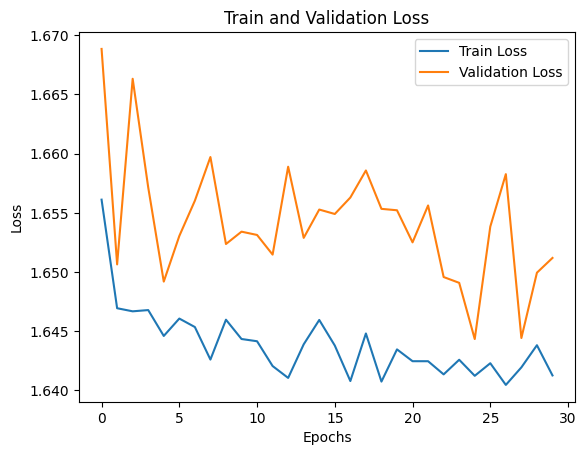

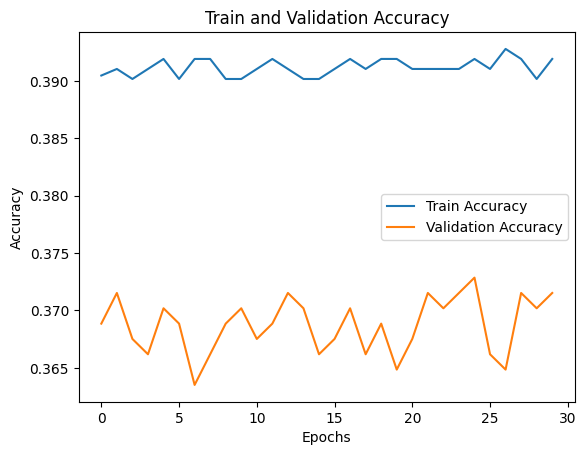

In [ ]:
# Plotting the loss curves
plt.figure()
plt.plot(train_loss_epochs, label='Train Loss')
plt.plot(valid_loss_epochs, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Validation Loss')
plt.legend()
plt.show()

# Plotting the accuracy curves
plt.figure()
plt.plot(train_acc_epochs, label='Train Accuracy')
plt.plot(valid_acc_epochs, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train and Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
# Load the best model weights
vgg19_model.load_state_dict(torch.load('best_model_vgg19.pth'))

# Make sure the model is in eval mode.
vgg19_model.eval()

test_losses = []
test_accs = []

# Iterate the testing set by batches.
for batch in tqdm(test_loader):
    # A batch consists of image data and corresponding labels.
    imgs, labels = batch
    imgs = imgs.to(device)
    labels = labels.to(device)

    # We don't need gradient in test
    # Using torch.no_grad() accelerates the forward process.
    with torch.no_grad():
        # Forward pass to get logits
        logits = vgg19_model(imgs)

        # Compute the loss
        loss = criterion(logits, labels)

        # Compute the accuracy for current batch.
        acc = (logits.argmax(dim=-1) == labels).float().mean()

    # Record loss and accuracy
    test_losses.append(loss.item())
    test_accs.append(acc.item())

# Calculate average test loss and accuracy
avg_test_loss = sum(test_losses) / len(test_losses)
avg_test_acc = sum(test_accs) / len(test_accs)

print(f'Test loss: {avg_test_loss}, Test accuracy: {avg_test_acc}')


  0%|          | 0/96 [00:00<?, ?it/s]

Test loss: 1.6299342003961403, Test accuracy: 0.3857421875


In [ ]:
densenetaoptimizer

In [ ]:
# Move the DenseNet model to the specified device
densenet_model.to(device)

# The number of training epochs
n_epochs = 30

# Initialize variables to keep track of the best validation accuracy and its corresponding epoch number
best_valid_acc = 0
best_epoch = 0
best_valid_loss = float('inf')
best_train_acc = 0
best_train_loss = float('inf')

# These are used to record information
train_loss_epochs = []
train_acc_epochs = []
valid_loss_epochs = []
valid_acc_epochs = []

for epoch in range(n_epochs):
    # Set the model to training mode
    densenet_model.train()

    # Lists to store training losses and accuracies
    train_loss = []
    train_accs = []

    # Training loop
    for batch in tqdm(train_loader):
        # Clear gradients
        densenetaoptimizer.zero_grad()

        # Move data to device
        imgs, labels = batch
        imgs = imgs.to(device)
        labels = labels.to(device)

        # Forward pass
        logits = densenet_model(imgs)

        # Compute loss
        loss = criterion(logits, labels)

        # Backpropagation
        loss.backward()

        # Update model parameters
        densenetaoptimizer.step()

        # Calculate accuracy
        acc = (logits.argmax(dim=-1) == labels).float().mean()

        # Record training loss and accuracy
        train_loss.append(loss.item())
        train_accs.append(acc.item())

    # Calculate average training loss and accuracy
    train_loss_avg = sum(train_loss) / len(train_loss)
    train_acc_avg = sum(train_accs) / len(train_accs)

    # Set the model to evaluation mode
    densenet_model.eval()

    # Lists to store validation losses and accuracies
    valid_loss = []
    valid_accs = []

    # Validation loop
    for batch in tqdm(valid_loader):
        # Move data to device
        imgs, labels = batch
        imgs = imgs.to(device)
        labels = labels.to(device)

        # Disable gradient calculation
        with torch.no_grad():
            # Forward pass
            logits = densenet_model(imgs)

            # Compute loss
            loss = criterion(logits, labels)

            # Calculate accuracy
            acc = (logits.argmax(dim=-1) == labels).float().mean()

            # Record validation loss and accuracy
            valid_loss.append(loss.item())
            valid_accs.append(acc.item())

    # Calculate average validation loss and accuracy
    valid_loss_avg = sum(valid_loss) / len(valid_loss)
    valid_acc_avg = sum(valid_accs) / len(valid_accs)

    # Save the best model based on validation accuracy
    if valid_acc_avg > best_valid_acc:
        best_valid_acc = valid_acc_avg
        best_epoch = epoch + 1
        best_valid_loss = valid_loss_avg
        best_train_acc = train_acc_avg
        best_train_loss = train_loss_avg
        torch.save(densenet_model.state_dict(), 'best_model_densenet.pth')

    # Print training information
    print(f"[Epoch: {epoch + 1}/{n_epochs}] Train: loss={train_loss_avg:.5f}, acc={train_acc_avg:.5f} | Valid: loss={valid_loss_avg:.5f}, acc={valid_acc_avg:.5f}")

# Print the best results
print(f"Best Epoch: {best_epoch}, Train Loss: {best_train_loss}, Train Acc: {best_train_acc}, Valid Loss: {best_valid_loss}, Valid Acc: {best_valid_acc}")


In [ ]:
# Plotting the loss curves
plt.figure()
plt.plot(train_loss_epochs, label='Train Loss')
plt.plot(valid_loss_epochs, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Validation Loss')
plt.legend()
plt.show()

# Plotting the accuracy curves
plt.figure()
plt.plot(train_acc_epochs, label='Train Accuracy')
plt.plot(valid_acc_epochs, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train and Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
# Load the best model weights
densenet_model.load_state_dict(torch.load('best_model_densenet.pth'))

# Make sure the model is in evaluation mode.
densenet_model.eval()

test_losses = []
test_accs = []

# Iterate over the testing set by batches.
for batch in tqdm(test_loader):
    # A batch consists of image data and corresponding labels.
    imgs, labels = batch
    imgs = imgs.to(device)
    labels = labels.to(device)

    # We don't need gradients during testing.
    with torch.no_grad():
        # Forward pass to get logits
        logits = densenet_model(imgs)

        # Compute the loss
        loss = criterion(logits, labels)

        # Compute the accuracy for the current batch.
        acc = (logits.argmax(dim=-1) == labels).float().mean()

    # Record loss and accuracy for the batch
    test_losses.append(loss.item())
    test_accs.append(acc.item())

# Calculate average test loss and accuracy
avg_test_loss = sum(test_losses) / len(test_losses)
avg_test_acc = sum(test_accs) / len(test_accs)

print(f'Test loss: {avg_test_loss}, Test accuracy: {avg_test_acc}')


In [ ]:
# Move the HRNet model to the specified device
hrnet_model.to(device)

# The number of training epochs.
n_epochs = 30

# Initialize variables to keep track of the best validation accuracy and its corresponding epoch number
best_valid_acc = 0
best_epoch = 0
best_valid_loss = float('inf')
best_train_acc = 0
best_train_loss = float('inf')

# These are used to record information
train_loss_epochs = []
train_acc_epochs = []
valid_loss_epochs = []
valid_acc_epochs = []

for epoch in range(n_epochs):

    # ---------- Training ----------
    # Make sure the model is in train mode before training.
    hrnet_model.train()

    # These are used to record information in training.
    train_loss = []
    train_accs = []

    # Iterate the training set by batches.
    for batch in tqdm(train_loader):
        # Gradients stored in the parameters in the previous step should be cleared out first.
        hrnet_optimizer.zero_grad()

        # A batch consists of image data and corresponding labels.
        imgs, labels = batch
        imgs = imgs.to(device)
        labels = labels.to(device)

        # Forward the data. (Make sure data and model are on the same device.)
        logits = hrnet_model(imgs)

        # Calculate the cross-entropy loss.
        loss = criterion(logits, labels)

        # Compute the gradients for parameters.
        loss.backward()

        # Update the parameters with computed gradients.
        hrnet_optimizer.step()

        # Compute the accuracy for the current batch.
        acc = (logits.argmax(dim=-1) == labels).float().mean()

        # Record the loss and accuracy.
        train_loss.append(loss.item())
        train_accs.append(acc.item())

    # The average loss and accuracy of the training set are the averages of the recorded values.
    train_loss_avg = sum(train_loss) / len(train_loss)
    train_acc_avg = sum(train_accs) / len(train_accs)
    train_loss_epochs.append(train_loss_avg)
    train_acc_epochs.append(train_acc_avg)

    # ---------- Validation ----------
    # Make sure the model is in eval mode so that some modules like dropout are disabled and work normally.
    hrnet_model.eval()

    # These are used to record information in validation.
    valid_loss = []
    valid_accs = []

    # Iterate the validation set by batches.
    for batch in tqdm(valid_loader):
        # A batch consists of image data and corresponding labels.
        imgs, labels = batch
        imgs = imgs.to(device)
        labels = labels.to(device)

        # We don't need gradient in validation.
        with torch.no_grad():
            logits = hrnet_model(imgs)

        # Compute the loss.
        loss = criterion(logits, labels)

        # Compute the accuracy for the current batch.
        acc = (logits.argmax(dim=-1) == labels).float().mean()

        # Record the loss and accuracy.
        valid_loss.append(loss.item())
        valid_accs.append(acc.item())

    # The average loss and accuracy for the entire validation set are the averages of the recorded values.
    valid_loss_avg = sum(valid_loss) / len(valid_loss)
    valid_acc_avg = sum(valid_accs) / len(valid_accs)
    valid_loss_epochs.append(valid_loss_avg)
    valid_acc_epochs.append(valid_acc_avg)

    # Save the best model based on validation accuracy
    if valid_acc_avg > best_valid_acc:
        best_valid_acc = valid_acc_avg
        best_epoch = epoch + 1  # Add 1 because epochs start from 0
        best_valid_loss = valid_loss_avg
        best_train_acc = train_acc_avg
        best_train_loss = train_loss_avg
        torch.save(hrnet_model.state_dict(), 'best_model_hrnet.pth')

    # Print the information for this epoch
    print(f"[Epoch: {epoch + 1:03d}/{n_epochs:03d}] Train: loss={train_loss_avg:.5f}, acc={train_acc_avg:.5f} | Valid: loss={valid_loss_avg:.5f}, acc={valid_acc_avg:.5f}")

# Return the results for the epoch with the best validation accuracy
print(f"Best Epoch: {best_epoch}, Train Loss: {best_train_loss}, Train Acc: {best_train_acc}, Valid Loss: {best_valid_loss}, Valid Acc: {best_valid_acc}")


In [ ]:
# Plotting the loss curves
plt.figure()
plt.plot(train_loss_epochs, label='Train Loss')
plt.plot(valid_loss_epochs, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Validation Loss')
plt.legend()
plt.show()

# Plotting the accuracy curves
plt.figure()
plt.plot(train_acc_epochs, label='Train Accuracy')
plt.plot(valid_acc_epochs, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train and Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
# load best model weights
hrnet_model.load_state_dict(torch.load('best_model_hrnet.pth'))

# Make sure the model is in eval mode.
# Some modules like Dropout or BatchNorm affect if the model is in training mode.
hrnet_model.eval()

test_losses = []
test_accs = []

# Iterate the testing set by batches.
for batch in tqdm(test_loader):
    # A batch consists of image data and corresponding labels.
    imgs, labels = batch
    imgs = imgs.to(device)
    labels = labels.to(device)

    # We don't need gradient in test
    # Using torch.no_grad() accelerates the forward process.
    with torch.no_grad():
        # Forward pass to get logits
        logits = hrnet_model(imgs)

        # Compute the loss
        loss = criterion(logits, labels)

        # Compute the accuracy for current batch.
        acc = (logits.argmax(dim=-1) == labels).float().mean()

    # Record loss and accuracy
    test_losses.append(loss.item())
    test_accs.append(acc.item())

# Calculate average test loss and accuracy
avg_test_loss = sum(test_losses) / len(test_losses)
avg_test_acc = sum(test_accs) / len(test_accs)

print(f'Test loss: {avg_test_loss}, Test accuracy: {avg_test_acc}')
